# Import necessary libraries #

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.utils import shuffle
from skimage.transform import resize

## Read all file names ##

In [3]:
pwd

'C:\\Users\\Pakistan\\Desktop\\NIVEDITHA\\Image Processing\\Bird Image Project\\Bird Image\\Bird Image\\images'

In [4]:
Spotted_Catbird=glob.glob("018.Spotted_Catbird/*.jpg")
Pelagic_Cormorant=glob.glob("025.Pelagic_Cormorant/*.jpg")
Purple_Finch=glob.glob("035.Purple_Finch/*.jpg")

In [10]:
len(Spotted_Catbird) 

45

In [11]:
len(Pelagic_Cormorant)

42

In [12]:
len(Purple_Finch)

42

## Read image data from all files and store it in a variable.Store the label as well ##

In [14]:
image =[]
label=[]
for i in Spotted_Catbird:
    img=plt.imread(i)
    image.append(img)
    label.append(0)

for i in Pelagic_Cormorant:
    img=plt.imread(i)
    image.append(img)
    label.append(1)

for i in Purple_Finch:
    img=plt.imread(i)
    image.append(img)
    label.append(2)

### Plot some of the images ###

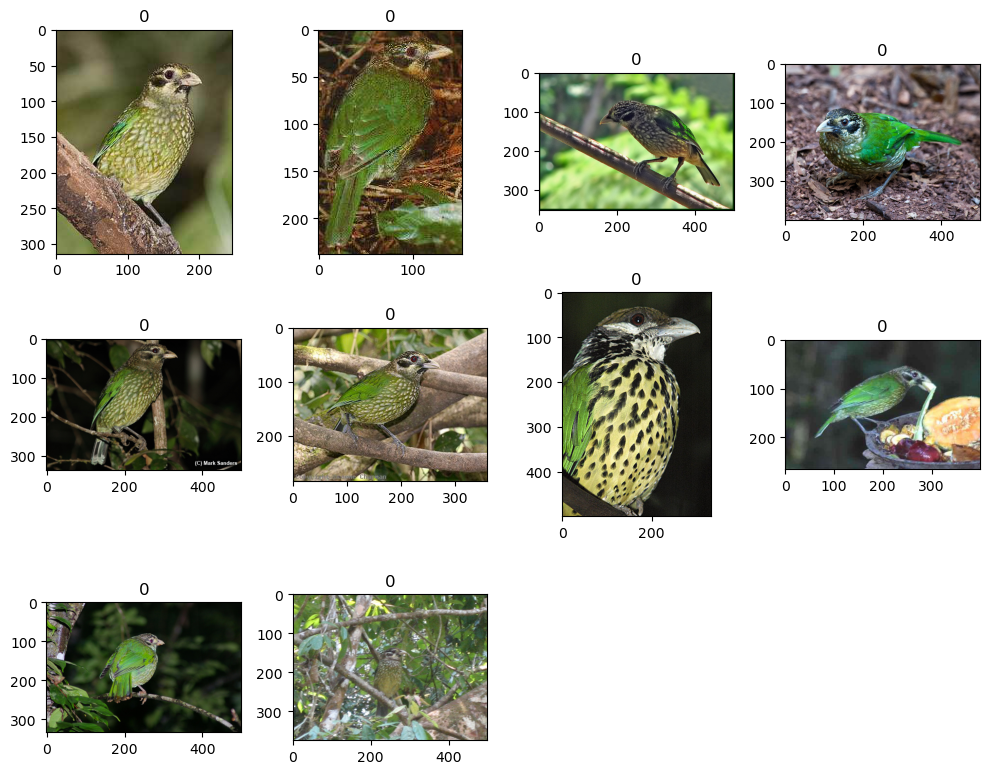

In [15]:
plt.figure(figsize=(10,8))
for i in range(10):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i])
    plt.title(label[i])
plt.tight_layout()

### Shuffle images and labels ###

In [17]:
image, label = shuffle(image, label)

### Plot the images once again ###

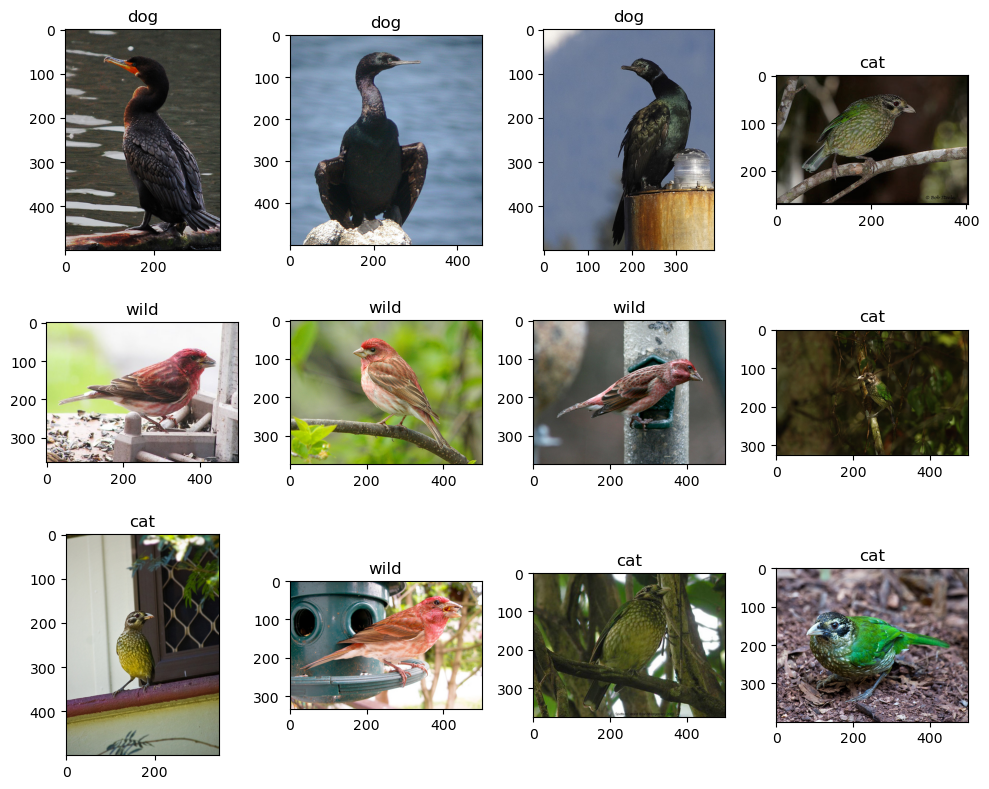

In [18]:
plt.figure(figsize=(10,8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i])
    if label[i] ==0:
        plt.title('cat')
    elif label[i]==1:
        plt.title('dog')
    else:
       plt.title('wild')
plt.tight_layout()

### Check the shape of some of the images ###

In [19]:
for i in range(10):
    print(image[i].shape)

(500, 350, 3)
(500, 458, 3)
(500, 387, 3)
(271, 404, 3)
(364, 500, 3)
(375, 500, 3)
(375, 500, 3)
(326, 500, 3)
(500, 345, 3)
(333, 500, 3)


In [20]:
x=[]
for i in image:
    x.append(resize(i, (500,500,3)))


### Convert images and labels to numpy array and store them as x and y variables ###

In [21]:
x= np.array(x)

In [22]:
y=np.array(label)

### Reshape the images to 1 dimension ###

In [23]:
d1,d2,d3,d4=x.shape

In [24]:
x=x.reshape((d1,d2*d3*d4))

### Train test Split ###

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train ,y_test=train_test_split(x,y,test_size=0.2)

### Create SVM Model and train it ###

In [27]:
from sklearn.svm import SVC

In [28]:
model=SVC()

In [29]:
%time model.fit(x_train,y_train)

CPU times: total: 22.3 s
Wall time: 14.1 s


SVC()

### Make predictions with x_test ###

In [30]:
%time y_pred=model.predict(x_test)

CPU times: total: 21 s
Wall time: 11.4 s


### Evaluate the model ###

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [32]:
accuracy_score(y_test,y_pred)

0.46153846153846156

<Axes: >

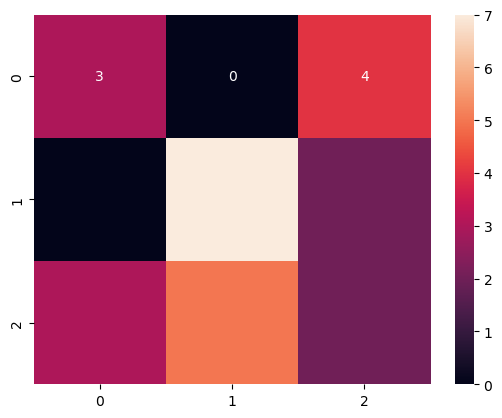

In [37]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True)

In [ ]:
print(classification_rep)